In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv("users/praneetpannu/downloads/twitter_training.csv")

In [40]:
df

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
66807,9200,Nvidia,Positive,just realized that the windows partition of my...
66808,9200,Nvidia,Positive,just realized that my mac window partition is ...
66809,9200,Nvidia,Positive,just realized the windows partition of my mac ...
66810,9200,Nvidia,Positive,just realized between the windows partition of...


In [41]:
df.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [42]:
df.tail()

,ID,Topic,Sentiment,Text
66807,9200,Nvidia,Positive,just realized that the windows partition of my...
66808,9200,Nvidia,Positive,just realized that my mac window partition is ...
66809,9200,Nvidia,Positive,just realized the windows partition of my mac ...
66810,9200,Nvidia,Positive,just realized between the windows partition of...
66811,9200,Nvidia,Positive,just like the windows partition of my mac is l...


In [43]:
df.shape

(66812, 4)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66812 entries, 0 to 66811
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         66812 non-null  int64 
 1   Topic      66812 non-null  object
 2   Sentiment  66812 non-null  object
 3   Text       66811 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [45]:
df.describe()

,ID
count,66812.000000
mean,6434.094115
std,3735.053030
min,1.000000
25%,3206.000000
50%,6424.000000
75%,9578.000000
max,13200.000000


In [46]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [47]:
df.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         1
dtype: int64

In [48]:
df.dropna(inplace=True)

In [49]:
df.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.duplicated().sum()

np.int64(0)

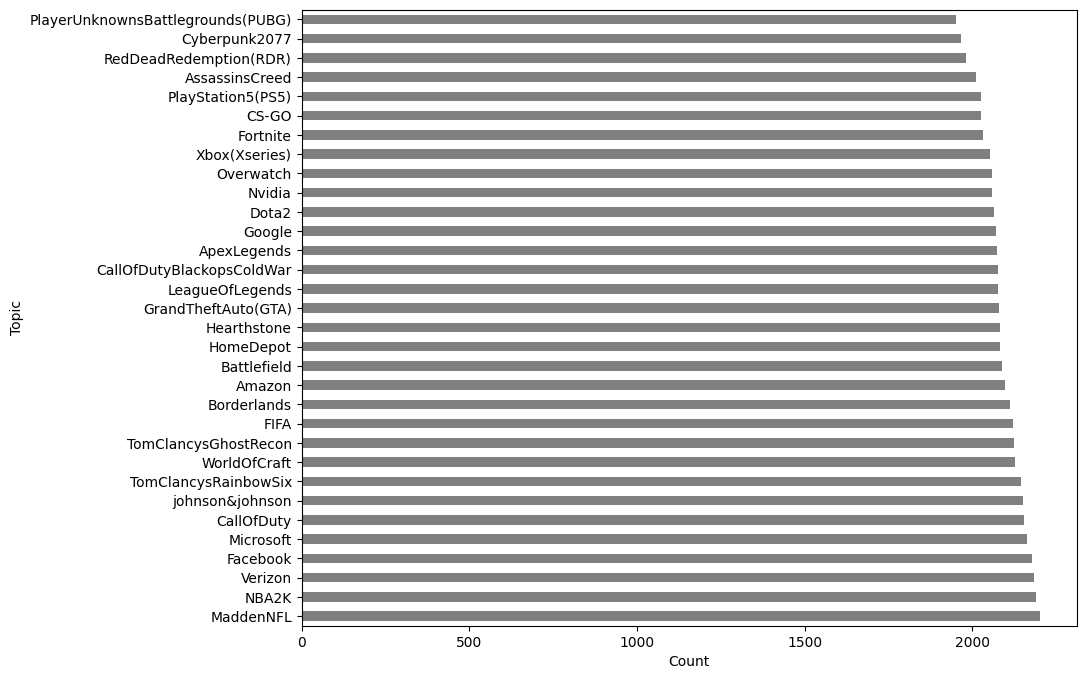

In [63]:
# Visualization of count of different topics
plt.figure(figsize=(10, 8))
df['Topic'].value_counts().plot(kind='barh', color='grey')
plt.xlabel("Count")
plt.ylabel("Topic")
plt.show()

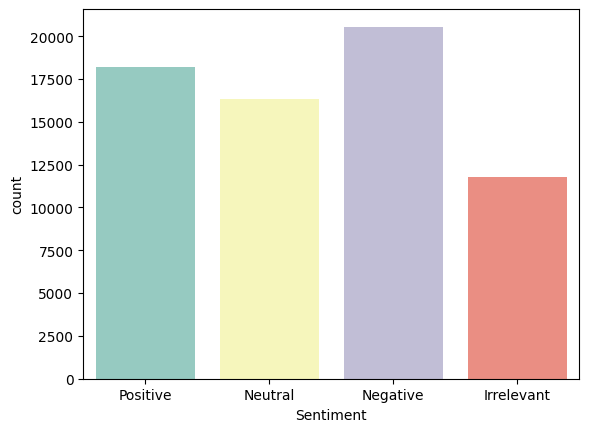

In [66]:
# Sentiment Distribution
sns.countplot(x='Sentiment', hue='Sentiment', data=df, palette="Set3", legend=False)
plt.show()

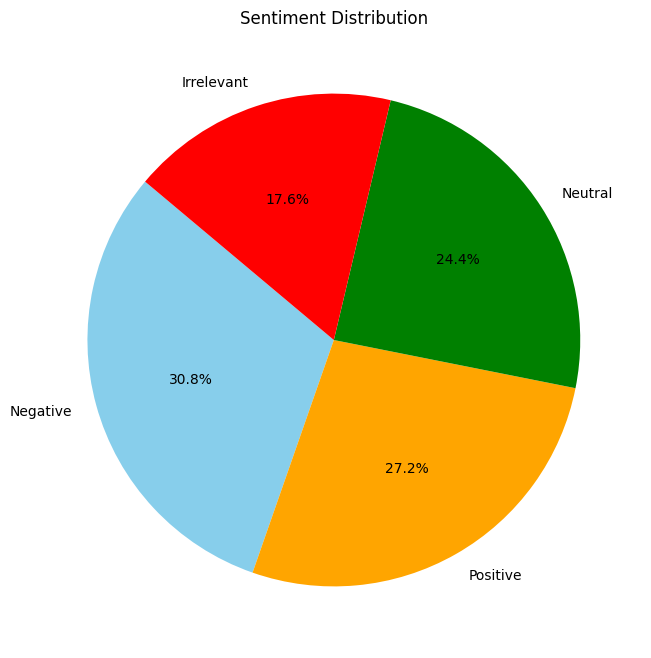

In [68]:
# Calculate the counts for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

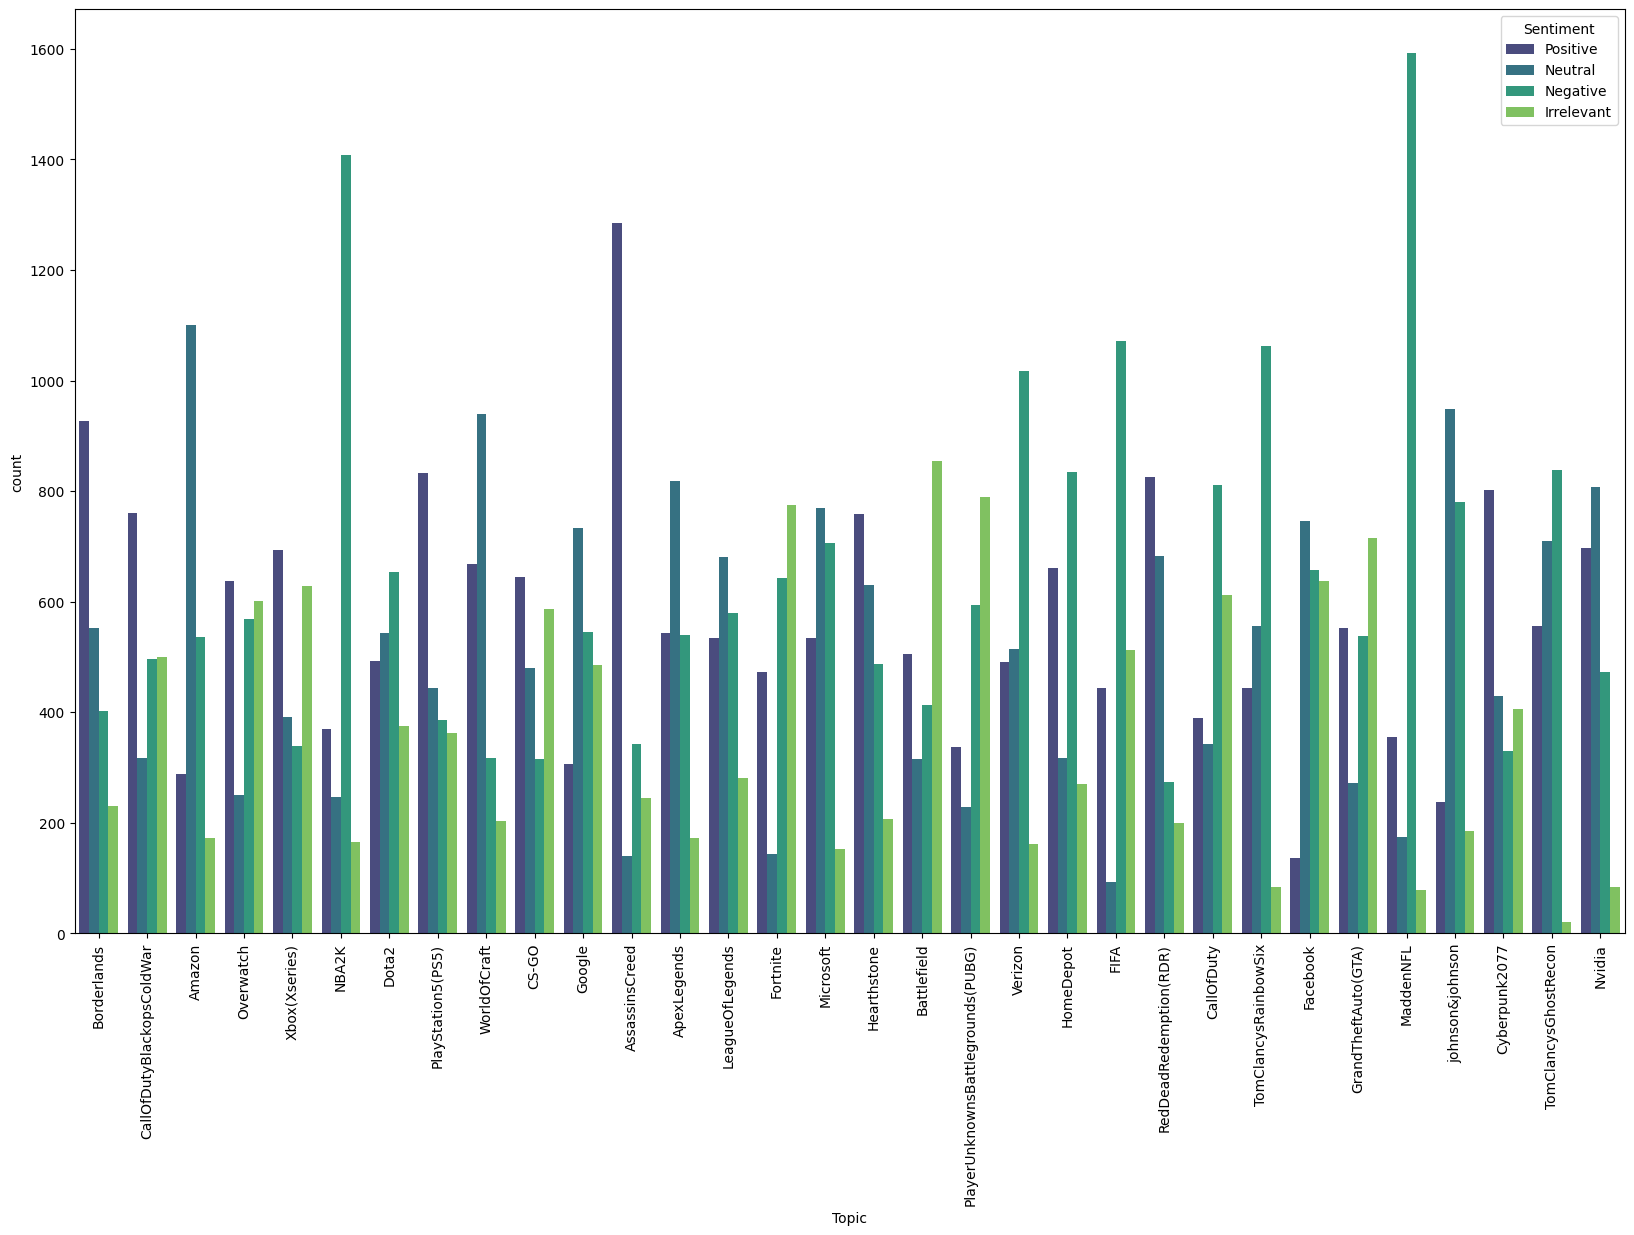

In [80]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=df,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [82]:
# Group by Topic and Sentiment
topic_wise_sentiment = df.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = df['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

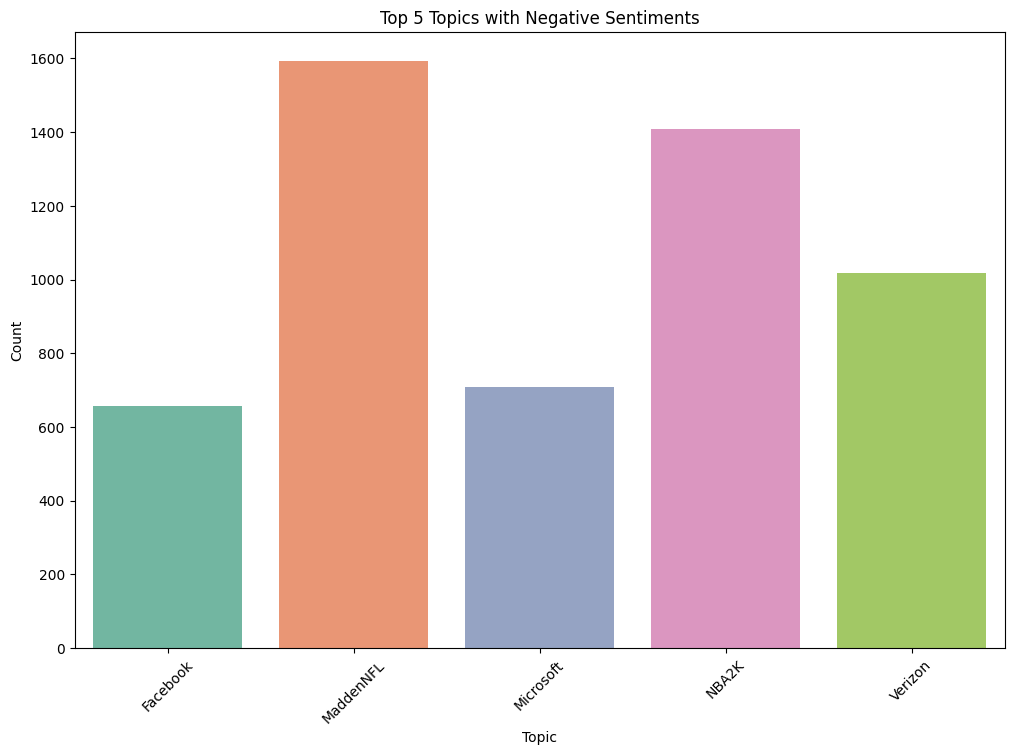

In [89]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'],
    x='Topic', 
    y='Count',
    hue='Topic',       
    palette='Set2',
    legend=False        
)
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

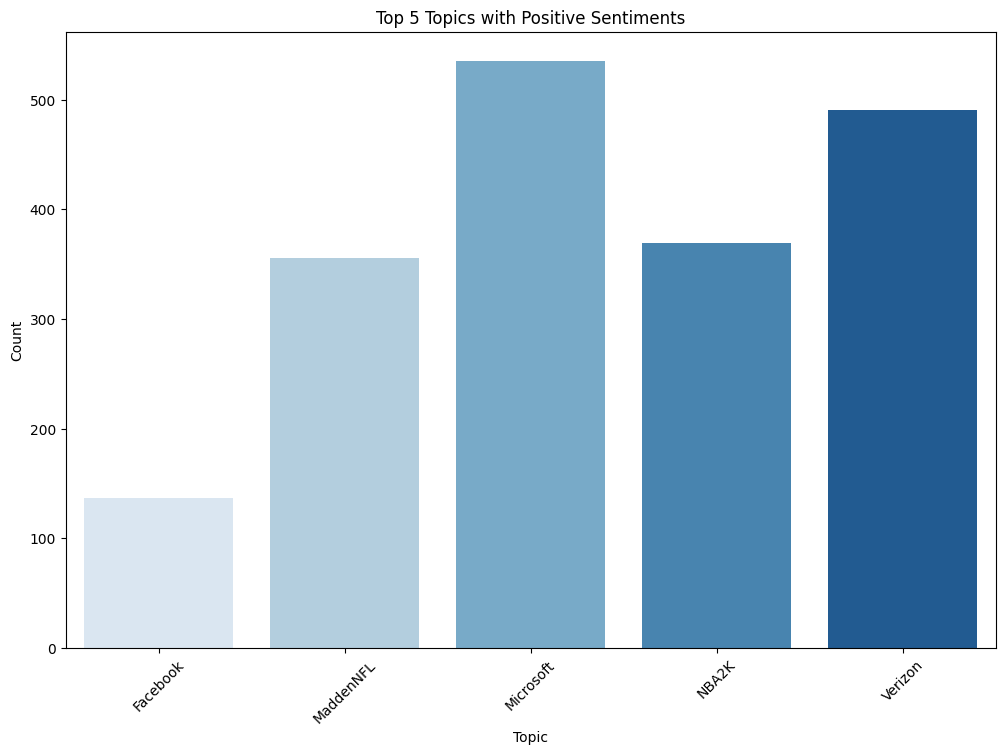

In [93]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'],
    x='Topic',
    y='Count',
    hue='Topic',        
    palette='Blues',
    legend=False    
)
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

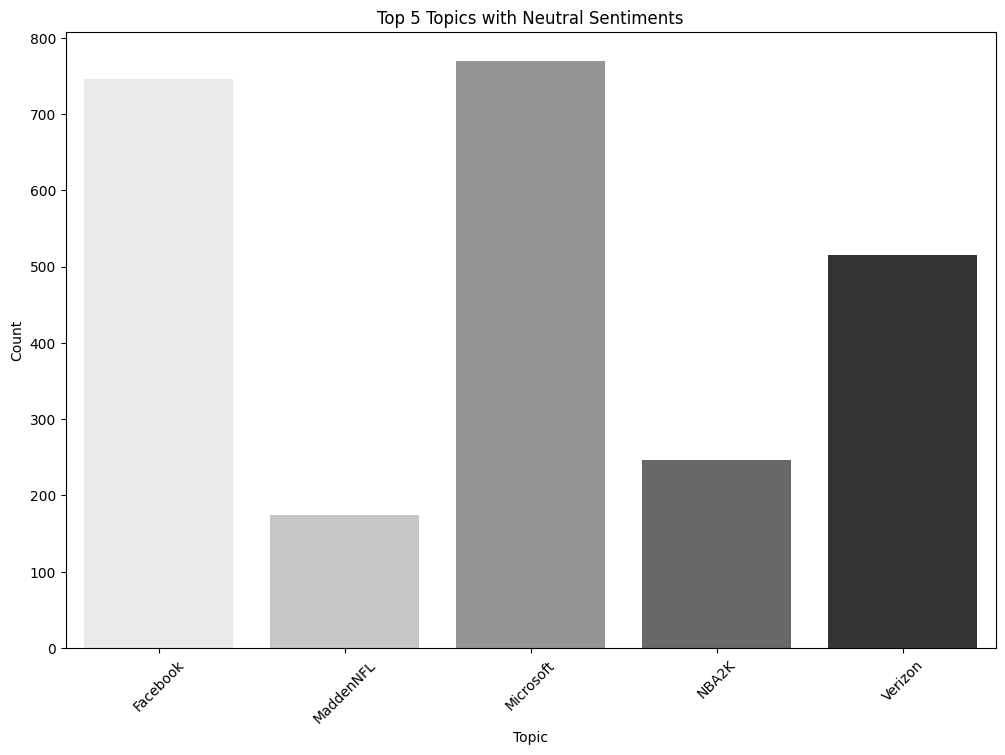

In [97]:
# Top 5 Topics with Neutral Sentiments
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'],
    x='Topic',
    y='Count',
    hue='Topic',        
    palette='Greys',
    legend=False        
)
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

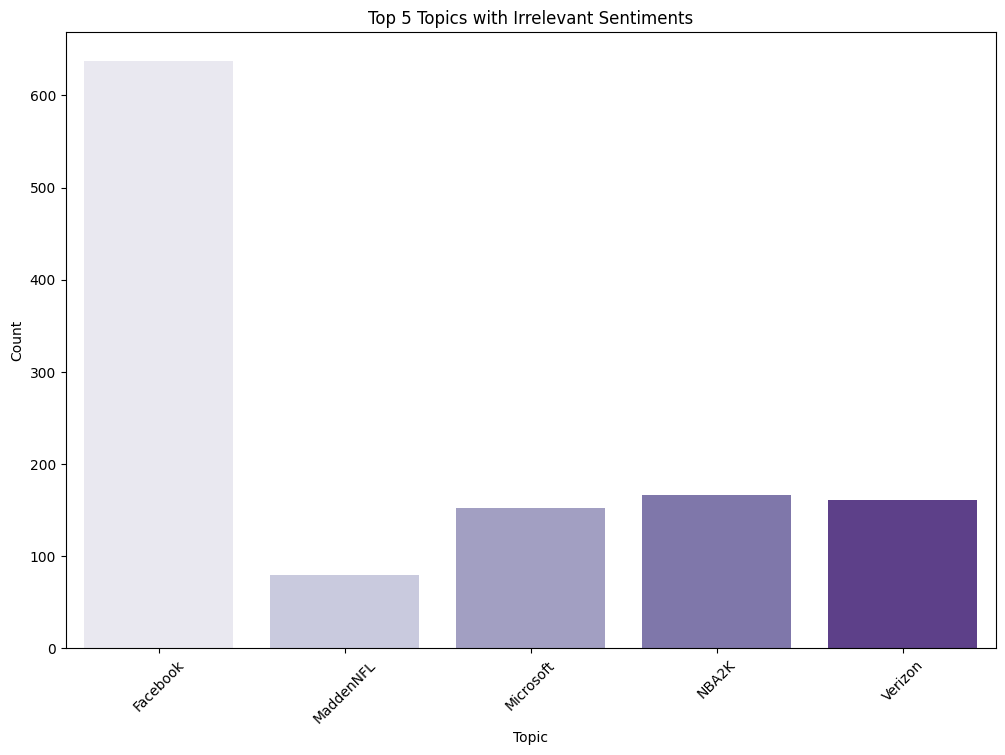

In [100]:
# Top 5 Topics with Irrelevant Sentiments
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'],
    x='Topic',
    y='Count',
    hue='Topic',        
    palette='Purples',
    legend=False        
)
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

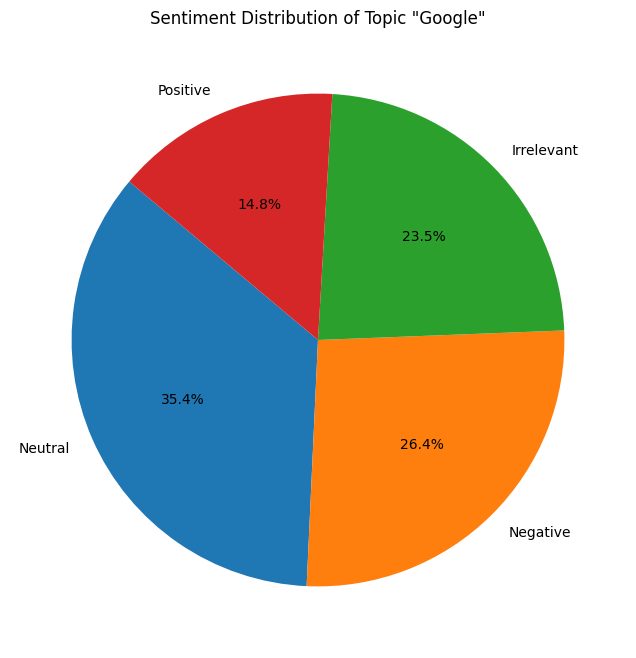

In [102]:
# Sentiment Distribution in Google

# Filter the dataset to include only entries related to the topic 'Google'
google_data = df[df['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

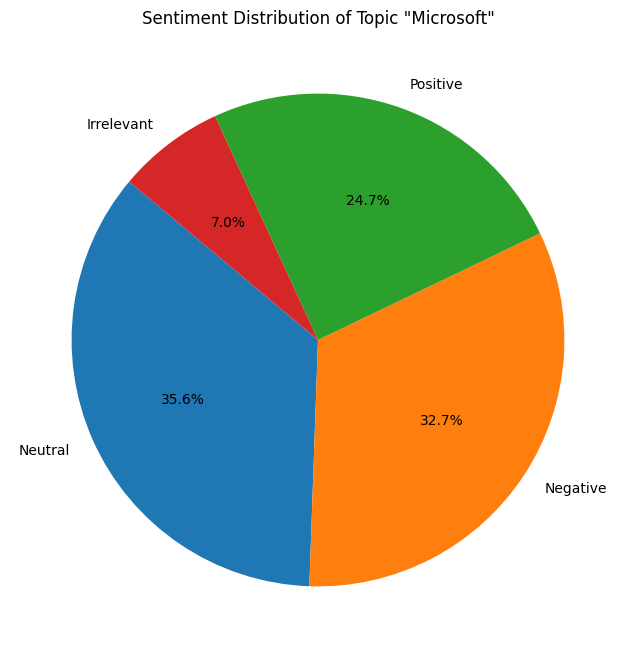

In [103]:
# Sentiment Distribution in Microsoft

# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = df[df['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [104]:
df['msg_len'] = df['Text'].apply(len)

In [105]:
df

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,51
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,50
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you all,49
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,50
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,56
...,...,...,...,...,...
66807,9200,Nvidia,Positive,just realized that the windows partition of my...,128
66808,9200,Nvidia,Positive,just realized that my mac window partition is ...,117
66809,9200,Nvidia,Positive,just realized the windows partition of my mac ...,125
66810,9200,Nvidia,Positive,just realized between the windows partition of...,157


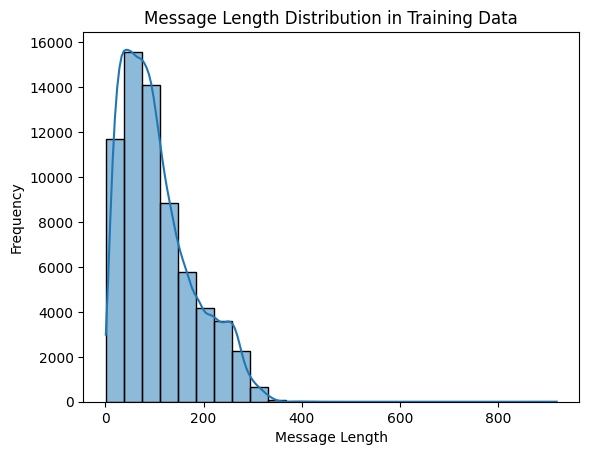

In [106]:
# Plot of message length distribution for training data
sns.histplot(df['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

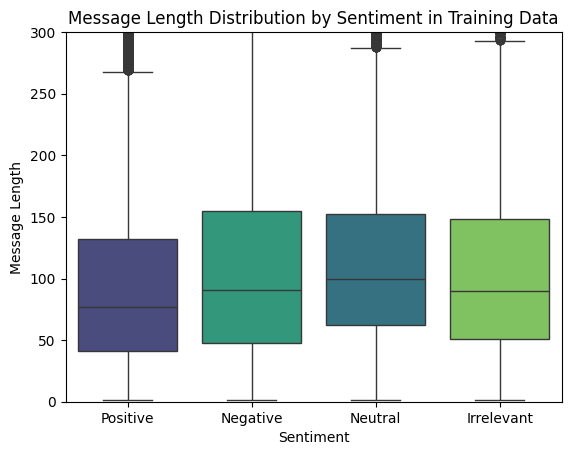

In [110]:
# Plot message length distribution by sentiment for training data
sns.boxplot(
    data=df,
    x='Sentiment',       # just the column name
    y='msg_len',
    hue='Sentiment',     # assign x to hue
    palette='viridis',
    order=['Positive', 'Negative', 'Neutral', 'Irrelevant'],
    dodge=False,         # avoid splitting boxes
    legend=False         # hide legend
)

plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0, 300)
plt.show()

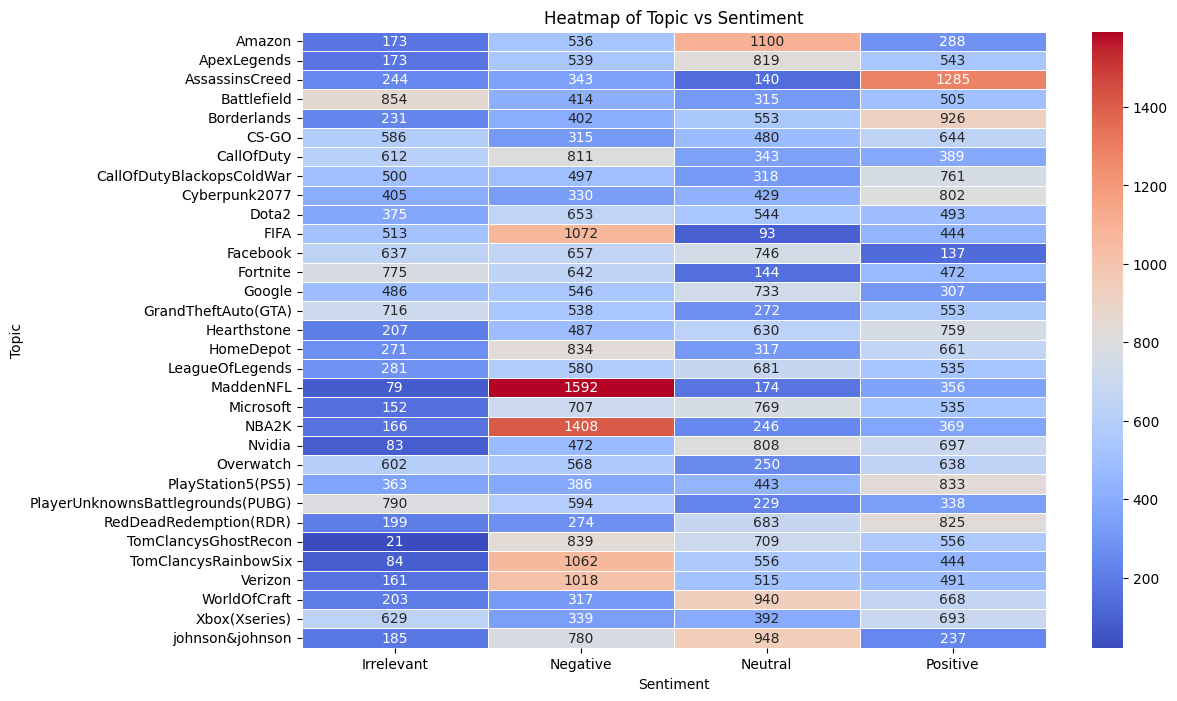

In [111]:
# Create the crosstab
crosstab = pd.crosstab(index=df['Topic'], columns=df['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()